In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')

In [3]:
df_train.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [4]:
df_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


<AxesSubplot:>

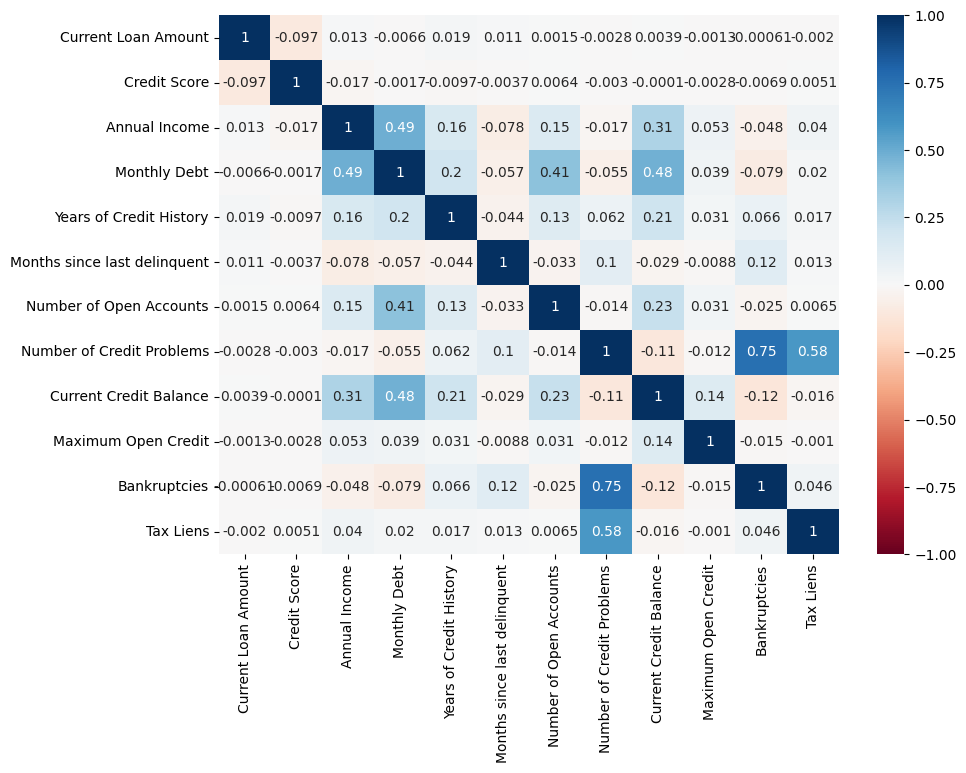

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

<AxesSubplot:>

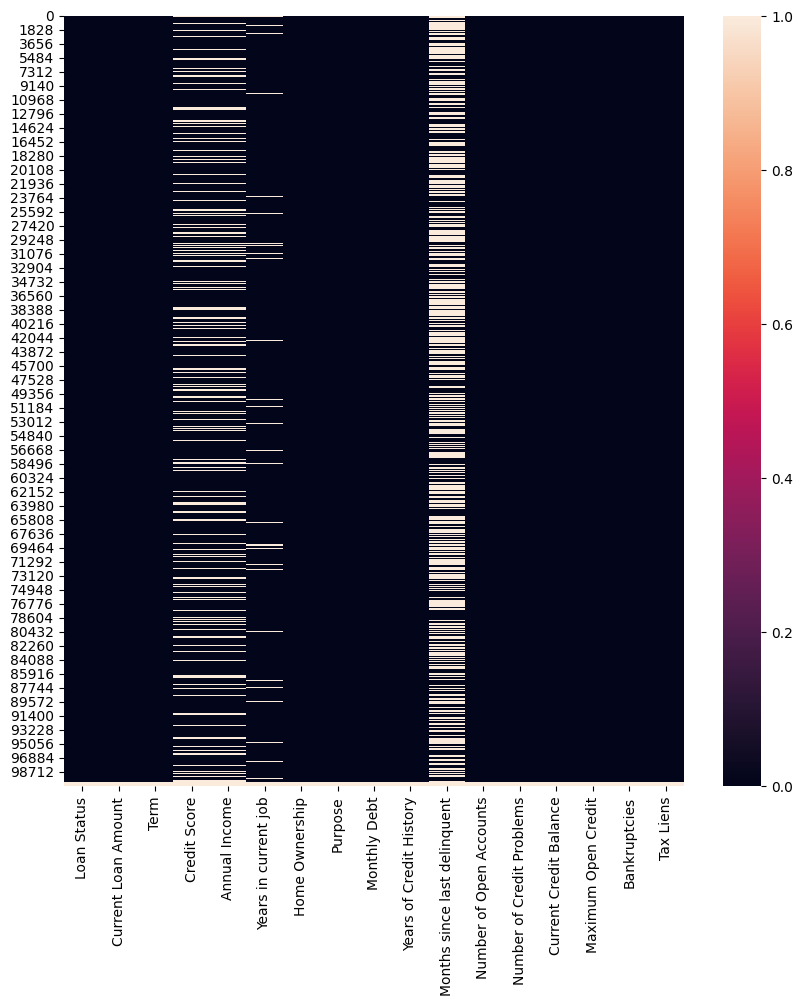

In [7]:
# Lets plot the heatmap for null values
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull())

Data Preprocessing

In [8]:
df_train=df_train.dropna(thresh=9)

In [9]:
df_train.drop_duplicates(inplace = True)

In [10]:
df_train.duplicated().sum()

0

In [11]:
columns=df_train.columns
for c in columns:
    print(c,':\n',df_train[c].unique())
    print(df_train[c].value_counts())
    print('\n',20*'**','\n')

Loan Status :
 ['Fully Paid' 'Charged Off']
Fully Paid     67146
Charged Off    22639
Name: Loan Status, dtype: int64

 **************************************** 

Current Loan Amount :
 [  445412.   262328. 99999999. ...   486046.   100254.   274076.]
99999999.0    11484
223322.0         24
223652.0         24
216194.0         24
223102.0         23
              ...  
45188.0           1
81246.0           1
515306.0          1
533016.0          1
274076.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

 **************************************** 

Term :
 ['Short Term' 'Long Term']
Short Term    66023
Long Term     23762
Name: Term, dtype: int64

 **************************************** 

Credit Score :
 [ 709.   nan  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.
  723.  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.
  733.  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.
  652.  736. 7380.  644.  672. 7370.  699.  751.

In [12]:
df_train.shape

(89785, 17)

In [13]:
df = df_train.copy()

Check for Missing Values

In [14]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(3)
        return mis_val_table_ren_columns

In [15]:
missing_values_table(df)

,Missing Values,% of Total Values
Months since last delinquent,48337,53.836
Credit Score,19154,21.333
Annual Income,19154,21.333
Years in current job,3802,4.235
Bankruptcies,190,0.212
Tax Liens,9,0.010
Maximum Open Credit,2,0.002


Since "Months since last delinquent" has upto 50% values missing, we will drop this column

In [16]:
df = df.drop(columns="Months since last delinquent", axis=1)

Also, the number of missing values are very small in: 
Bankruptcies, 
Tax Liens, 
Maximum Open Credit

Hence, NA values will be dropped

In [17]:
df.dropna(subset=["Maximum Open Credit"] , inplace = True)
df.dropna(subset=["Tax Liens"] , inplace = True)
df.dropna(subset=["Bankruptcies"] , inplace = True)

In [18]:
df.shape

(89593, 16)

In [19]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331
Years in current job,3802,4.244


In [20]:
df['Years in current job'].value_counts()

10+ years    27726
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years in current job, dtype: int64

In [21]:
df['Years in current job'].mode()

0    10+ years
dtype: object

In [22]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [23]:
df['Years in current job'].value_counts()

10+ years    31528
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years in current job, dtype: int64

In [24]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)

In [25]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331


In [26]:
df[df['Credit Score']>800]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
43,Charged Off,288948.0,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
51,Charged Off,219692.0,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,Charged Off,78012.0,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,Charged Off,523908.0,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,Charged Off,198572.0,Short Term,7420.0,526205.0,2.0,Rent,Debt Consolidation,9910.02,16.5,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,Charged Off,110924.0,Short Term,7070.0,804631.0,4.0,Rent,Debt Consolidation,11533.00,13.3,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,Charged Off,175362.0,Short Term,6880.0,1060162.0,9.0,Rent,Debt Consolidation,16079.13,17.3,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,Charged Off,88968.0,Short Term,6790.0,441845.0,1.0,Rent,other,5375.86,8.5,10.0,0.0,193306.0,535458.0,0.0,0.0


4540 rows has credit score greater than 800. This is not possible since maximum credit score is 800. Let us check the distribution for credit scores greater than 800

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

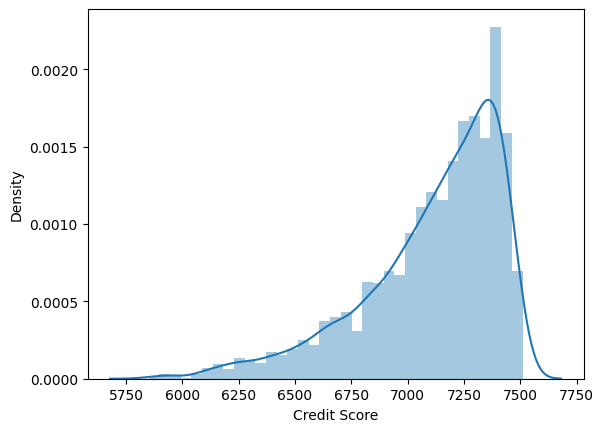

In [27]:
sns.distplot(df_train[df_train['Credit Score']>800]['Credit Score'])

Scores range from 5750 to 7750. This show that the credit score data has been multiplied by 10 for some rows. We will create a function to fix this

In [28]:
def credit_error(value):
    credit_value = value
    credit_value['Credit Score'] = np.where(value['Credit Score'] > 800, value['Credit Score'].values /10, value['Credit Score'])
    return credit_value

In [29]:
data = credit_error(df)

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,89593.0,1.305835e+07,3.329246e+07,15422.0,180334.00,314094.00,532642.0,1.000000e+08
Credit Score,70482.0,7.185656e+02,2.813334e+01,585.0,706.00,725.00,740.0,7.510000e+02
Annual Income,70482.0,1.375957e+06,1.104330e+06,76627.0,848160.00,1169773.00,1648915.0,1.655574e+08
Years in current job,89593.0,6.137544e+00,3.519618e+00,1.0,3.00,6.00,10.0,1.000000e+01
Monthly Debt,89593.0,1.841181e+04,1.214235e+04,0.0,10176.97,16149.81,23932.4,4.358433e+05
Years of Credit History,89593.0,1.824300e+01,7.034235e+00,3.6,13.50,17.00,21.7,7.050000e+01
Number of Open Accounts,89593.0,1.112574e+01,4.996396e+00,0.0,8.00,10.00,14.0,7.600000e+01
Number of Credit Problems,89593.0,1.652473e-01,4.783988e-01,0.0,0.00,0.00,0.0,1.500000e+01
Current Credit Balance,89593.0,2.940685e+05,3.720957e+05,0.0,113031.00,209855.00,367688.0,3.287897e+07
Maximum Open Credit,89593.0,7.720317e+05,8.766674e+06,0.0,277134.00,472670.00,791362.0,1.539738e+09


In [31]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

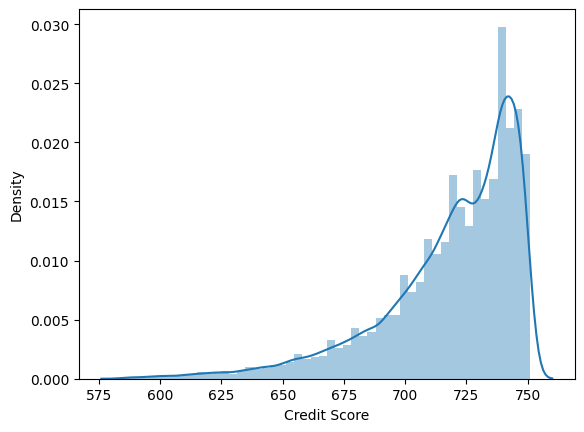

In [32]:
sns.distplot(data['Credit Score'])

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

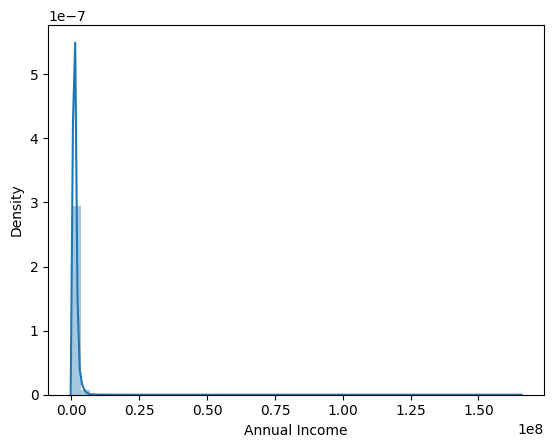

In [33]:
sns.distplot(data['Annual Income'])

Let's fill the empty rows of "Annual Income" and "Credit Score" with the median.

In [34]:
data['Credit Score'].fillna(data['Credit Score'].median(),inplace= True)

data['Annual Income'].fillna(data['Annual Income'].median(),inplace= True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  object 
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  object 
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  float64
 6   Home Ownership             89593 non-null  object 
 7   Purpose                    89593 non-null  object 
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  flo

## Visualization of Features

Loan Status

Fully Paid     67006
Charged Off    22587
Name: Loan Status, dtype: int64


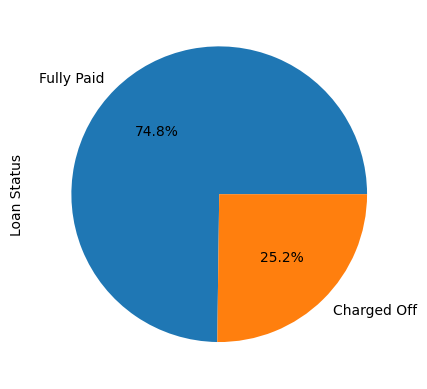

In [36]:
data['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(data['Loan Status'].value_counts())

To check for imbalanced data, we will find the ratio

In [37]:
r = data["Loan Status"].value_counts()[0]/data["Loan Status"].value_counts()[1]
r

2.96657369283216

Therefore there is presence of imbalanced data

Term

Short Term    65831
Long Term     23762
Name: Term, dtype: int64


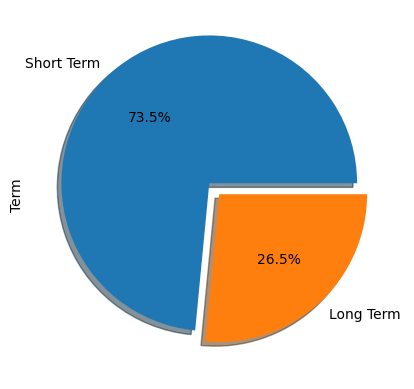

In [38]:
data['Term'].value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%',shadow=True)
print(data['Term'].value_counts())

Loan Status v/s Years in Current Job

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

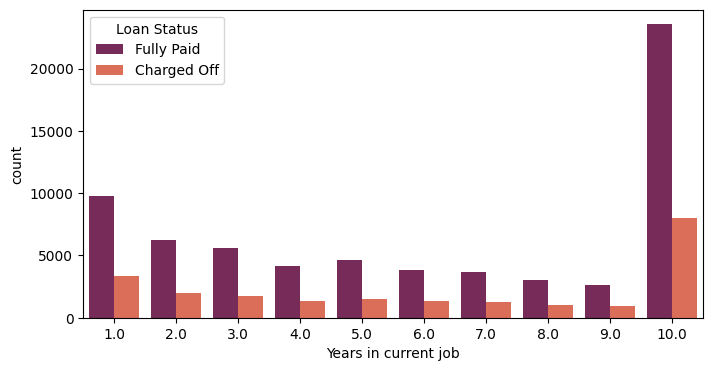

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Years in current job'],hue=data['Loan Status'],palette='rocket')

This shows that people with 10+ years of experience, loan status is fully paid

In [40]:
data.Purpose = data.Purpose.str.replace('other','Other')
data['Purpose'].value_counts()

Debt Consolidation      70724
Other                    8084
Home Improvements        5226
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

Text(0.5, 1.0, 'Purpose of taking Loan')

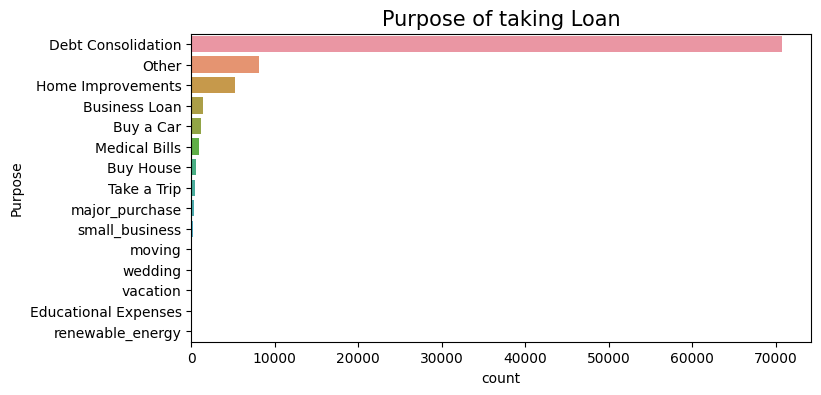

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(y='Purpose' , data=data, order = data['Purpose'].value_counts().index)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':15})

This shows majority people have taken loan for debt consolidation

Let us consider Home Ownership

In [42]:
data['Home Ownership'].value_counts()

Home Mortgage    43479
Rent             37750
Own Home          8182
HaveMortgage       182
Name: Home Ownership, dtype: int64

Home Ownership in coexistance with the Loan Status

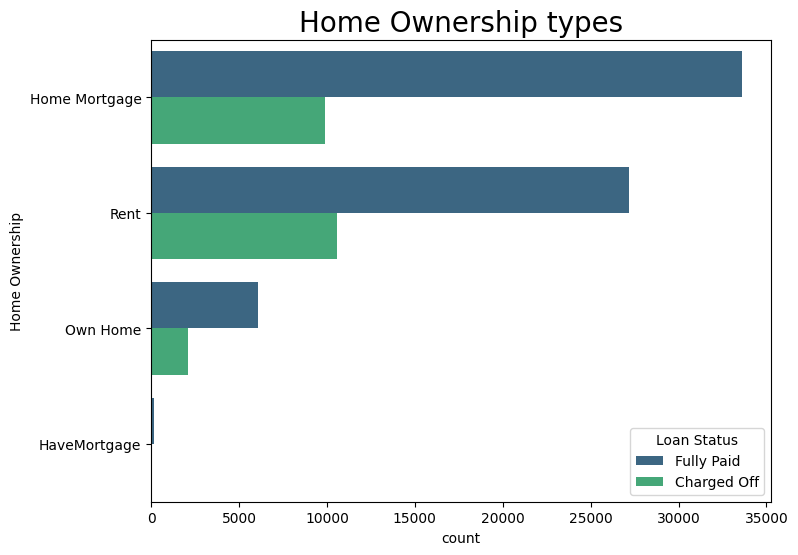

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(y='Home Ownership' , data=data, order = data['Home Ownership'].value_counts().index, hue='Loan Status', palette = 'viridis')
plt.title('Home Ownership types' , fontdict={'fontsize':20})
plt.legend(title="Loan Status", loc="lower right")

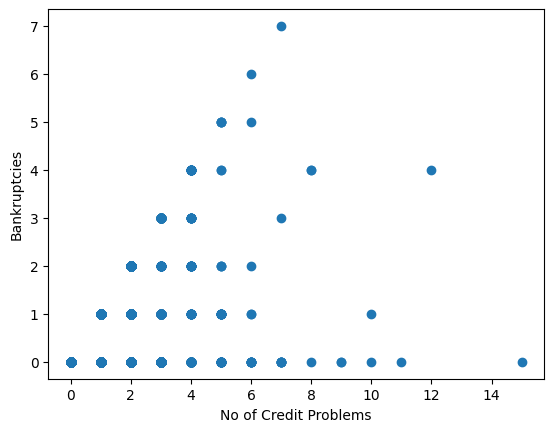

In [44]:
plt.scatter(x= 'Number of Credit Problems' , y='Bankruptcies' ,data= data)
plt.xlabel("No of Credit Problems")
plt.ylabel("Bankruptcies")
plt.show()

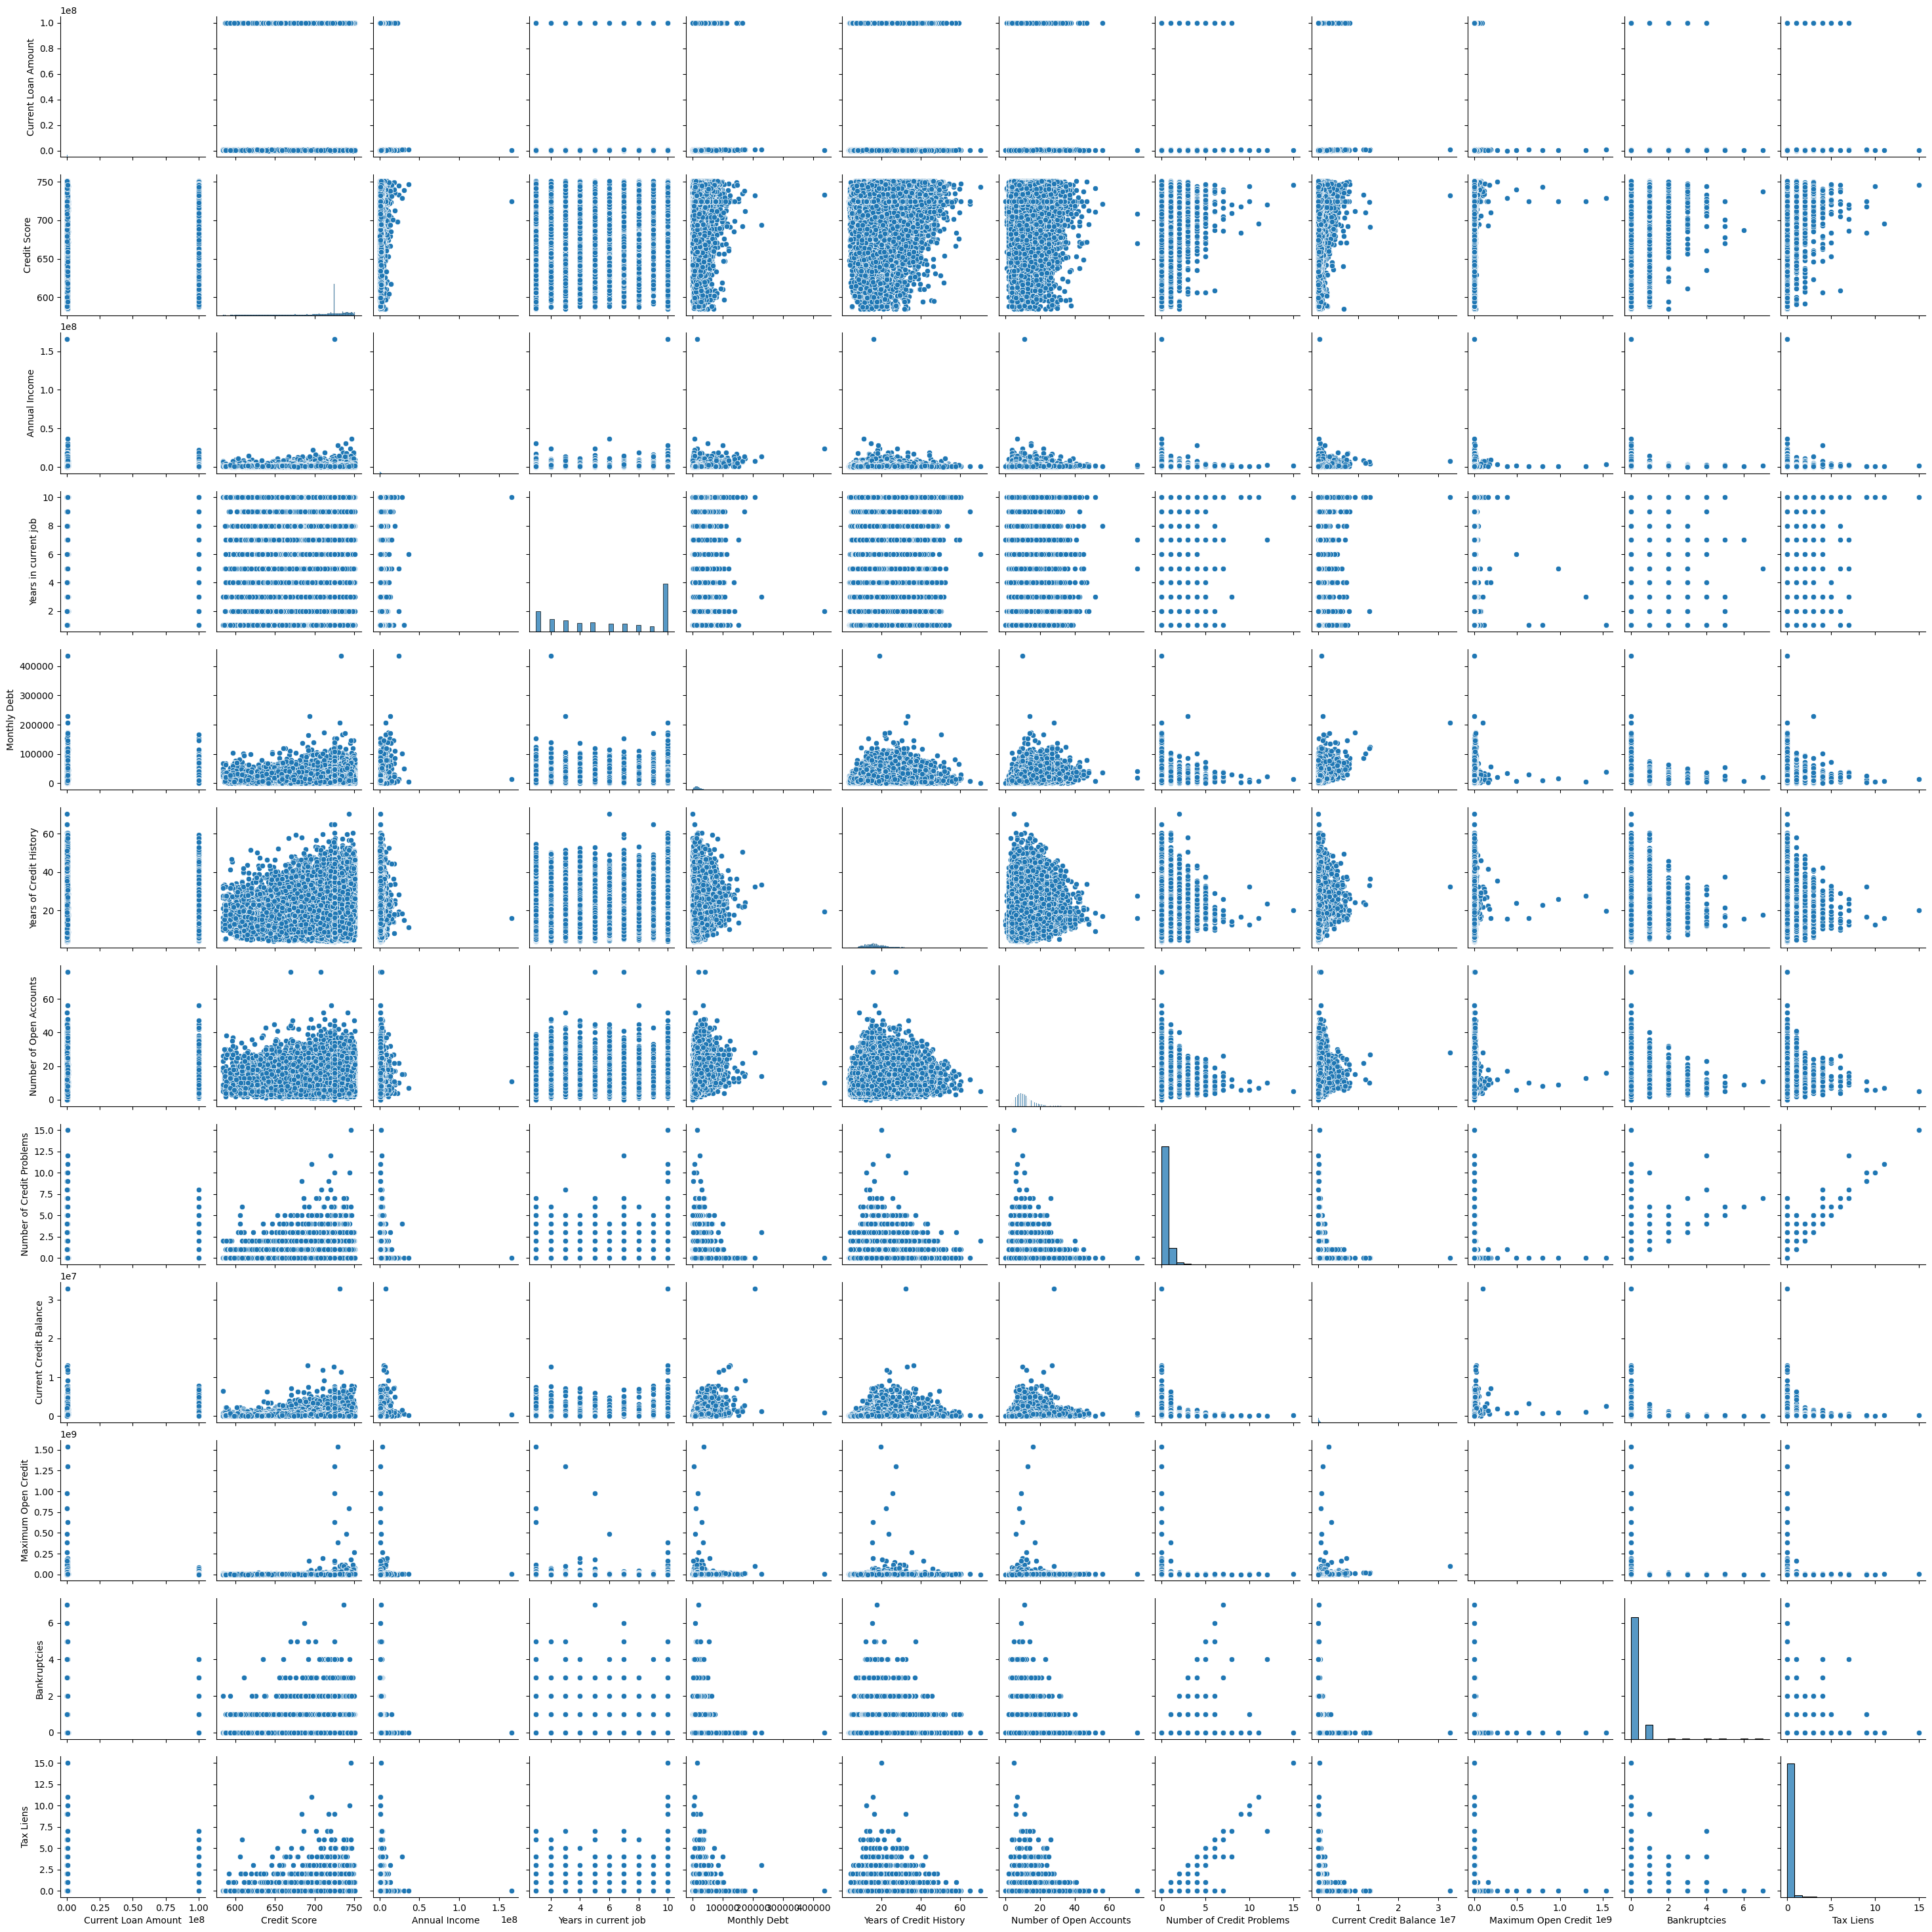

In [45]:
sns.pairplot(data)

In [46]:
from sklearn import preprocessing
categorical_features = ['Loan Status','Term','Home Ownership','Purpose']
le = preprocessing.LabelEncoder()
for col in categorical_features:
    data[col]=le.fit_transform(data[col])

In [47]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### Let us deal with outliers

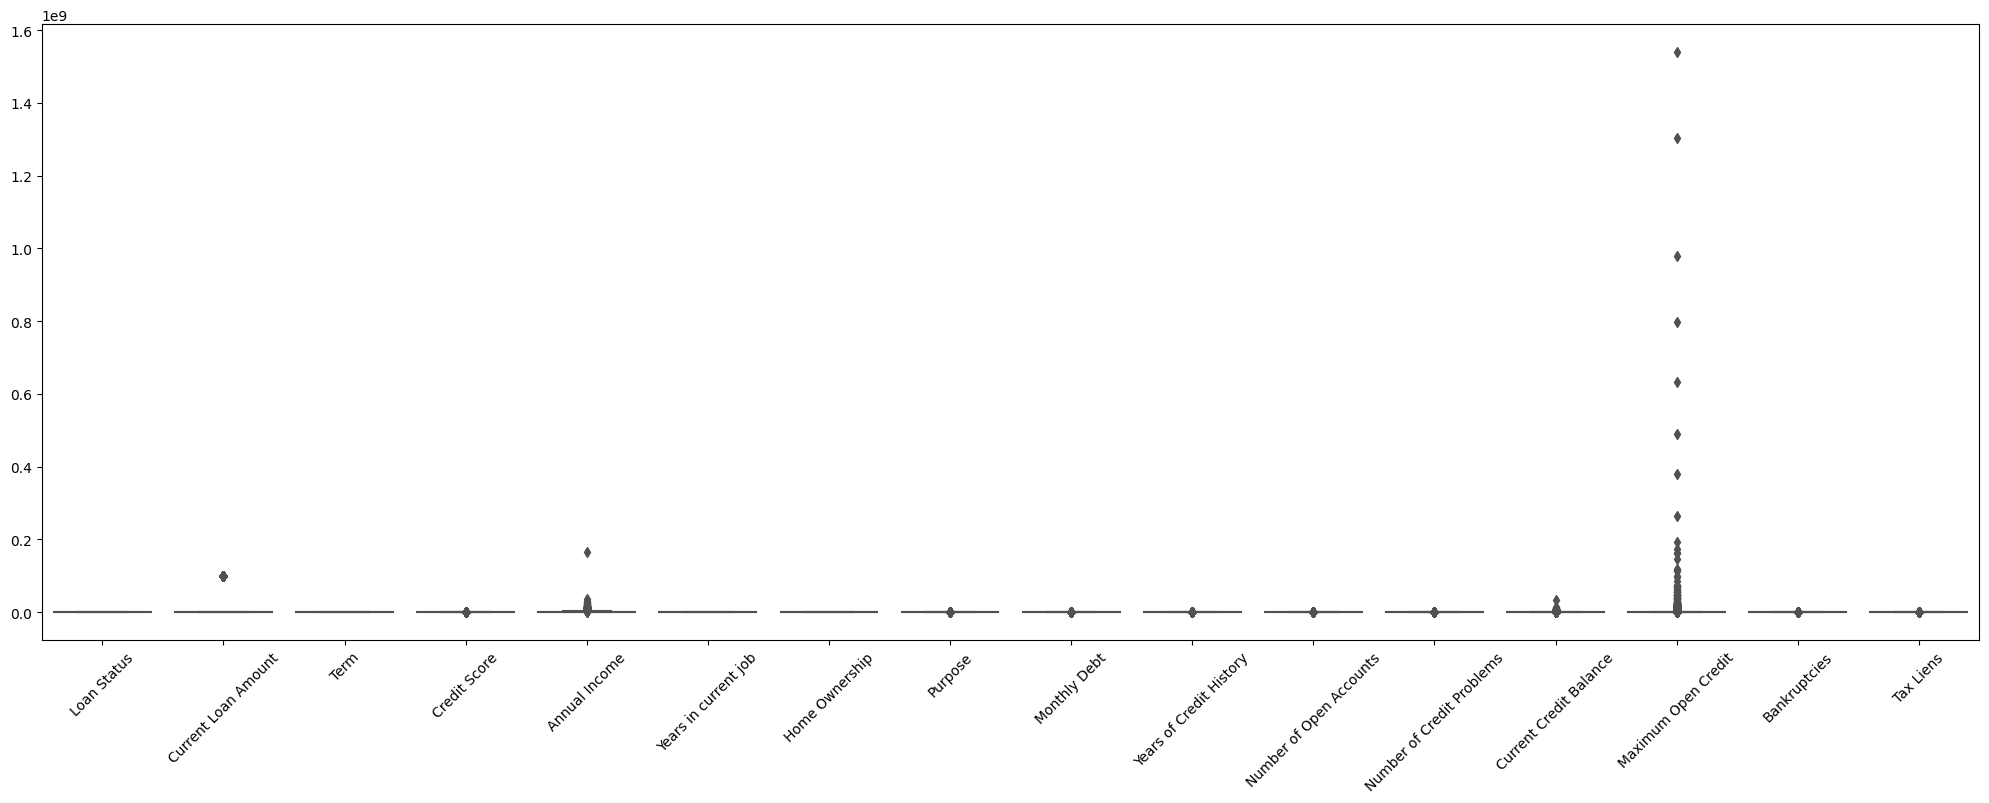

In [48]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)
plt.show()

There is clear presence of outliers. Let us check through the interquantile range

In [49]:
def def_outliers(data , col):
    outlier_table=pd.DataFrame(columns=[ "< Q1" , "> Q3" ],index=[col])

    for col_ in col:
        outlier=data[col_]
        Q1=outlier.quantile(0.25)
        Q3=outlier.quantile(0.75)
        IQR=Q3-Q1
        underoutliers=Q1-1.5*IQR
        upperoutliers=Q3+1.5*IQR
        under_border=(outlier<underoutliers)
        upper_border=(outlier>upperoutliers)

        outlier_table.loc[col_,"< Q1"] = sum(under_border)
        outlier_table.loc[col_,"> Q3"] = sum(upper_border)
         
    return outlier_table

num_col=  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt','Current Credit Balance','Maximum Open Credit']
def_outliers(data , num_col)

,< Q1,> Q3
Current Loan Amount,0,11457
Credit Score,6319,0
Annual Income,3,6345
Monthly Debt,0,3014
Current Credit Balance,0,4643
Maximum Open Credit,0,5177


In [50]:
def cut(df,feature):
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    iqr = q3 - q1
    df = df.loc[((q1 - 3*iqr < df[feature]) & (df[feature] < q3 + 3*iqr))] 
    return df
for i in num_col:
    data = cut(data,i)

### Lets split the data into Train and Test

In [51]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,0,206602.0,1,729.0,896857.0,10.0,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [53]:
x = data.drop(['Loan Status'], axis=1).values
y = data['Loan Status'].values

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state= 1)

rs = RobustScaler()
x_train = rs.fit_transform(X_train)
x_test = rs.fit_transform(X_test)

Implementation of Logistic Regression, K-Nearest Neighbours, Decision Tree and Random Forest Classifier

In [54]:
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier(max_features=6, max_depth=4)
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth=6)
model_xgb = xgb.XGBClassifier(objective="binary:logistic")

In [55]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [56]:
model_lr.fit(x_train, y_train)
model_knn.fit(x_train, y_train)
model_dt.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

lr_pred = model_lr.predict(x_test)
knn_pred = model_knn.predict(x_test)
dt_pred = model_dt.predict(x_test)
rf_pred = model_rf.predict(x_test)

In [57]:
grid_cv = GridSearchCV(model_xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [58]:
grid_cv.best_score_

0.6455538620984437

In [59]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 10,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [60]:
model_xgb_new = xgb.XGBClassifier(**grid_cv.best_params_, objective="binary:logistic")
model_xgb_new.fit(x_train,y_train)
xgb_predict = model_xgb_new.predict(x_test)

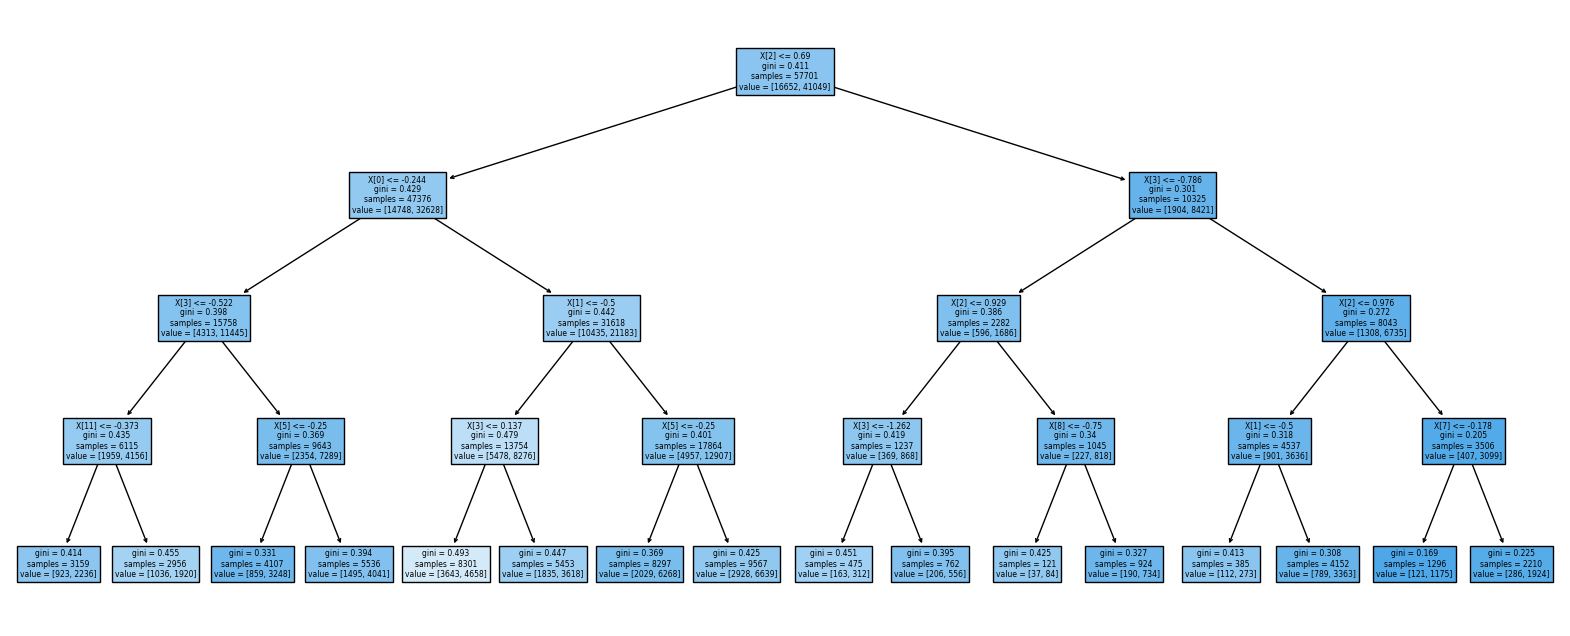

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(20,8))
tree.plot_tree(model_dt , filled=True)
plt.show()

In [62]:
acc_train = [model_lr.score(x_train,y_train), model_knn.score(x_train,y_train), model_dt.score(x_train,y_train), model_rf.score(x_train,y_train), model_xgb_new.score(x_train,y_train)]
acc_test = [model_lr.score(x_test,y_test), model_knn.score(x_test,y_test), model_dt.score(x_test,y_test), model_rf.score(x_test,y_test), model_xgb_new.score(x_test,y_test)]

In [63]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [64]:
f1_test = [f1_score(y_test,lr_pred), f1_score(y_test, knn_pred), f1_score(y_test, dt_pred), f1_score(y_test,rf_pred), f1_score(y_test,xgb_predict)]
recall_test = [recall_score(y_test, lr_pred), recall_score(y_test, knn_pred), recall_score(y_test, dt_pred), recall_score(y_test, rf_pred), recall_score(y_test,xgb_predict)]
precision_test = [precision_score(y_test, lr_pred), precision_score(y_test, knn_pred), precision_score(y_test, dt_pred), precision_score(y_test, rf_pred), precision_score(y_test,xgb_predict)]

In [65]:
metric_df = pd.DataFrame({"Accuracy for Training Data":acc_train, "Accuracy for Testing Data":acc_test, "Recall Score":recall_test, "Precision Score":precision_test, "F1 Score":f1_test},
                         index=["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XG Boost"])
metric_df

,Accuracy for Training Data,Accuracy for Testing Data,Recall Score,Precision Score,F1 Score
Logistic Regression,0.713263,0.708027,0.981919,0.713870,0.826709
KNN,0.809657,0.652502,0.814894,0.727765,0.768869
Decision Tree,0.711409,0.709275,1.000000,0.709275,0.829913
Random Forest,0.713766,0.708374,0.995504,0.709974,0.828838
XG Boost,0.711565,0.709206,0.999902,0.709255,0.829866


In [66]:
from sklearn.metrics import confusion_matrix
cf_lr = confusion_matrix(y_test, lr_pred)

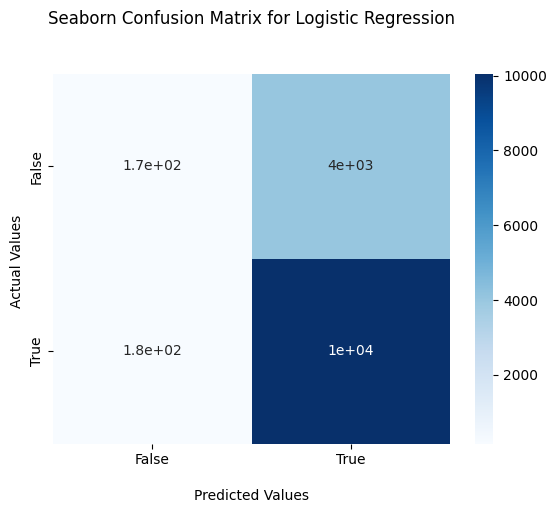

In [67]:
ax = sns.heatmap(cf_lr, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Logistic Regression\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [68]:
test = np.array([45412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0]).reshape(1,-1)

model_xgb_new.predict(test)

array([1])

In [69]:
len(x_train[0])

15

### Pickle the model

In [70]:
import pickle

In [74]:
pickle.dump(model_xgb_new, open('xgbclassifier.pkl','wb'))
pickle.dump(rs, open('scaling.pkl','wb'))

In [72]:
pickled_model = pickle.load(open('xgbclassifier.pkl', 'rb'))

In [73]:
pickled_model.predict(test)

array([1])